In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy as scp



In [2]:
raw_data=pd.read_excel('Assigment Data-BDA module.xlsx', index_col=0)  
raw_data = raw_data[raw_data['DiscountedPrice']>0]
raw_data['Profit']=raw_data['DiscountedPrice']-raw_data['PromotionPrice']
raw_data=raw_data[raw_data.Profit > 0]
#raw_data


In [3]:

Historical_data = raw_data[raw_data['File_Type']=='Historical']
#Historical_data_top_1quantile=Historical_data[Historical_data.SoldCount > Historical_data.SoldCount.quantile(.95)]


In [4]:
Historical_data=Historical_data.sort_values(by=['SoldCount'], ascending=False)
Historical_data



,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,DiscountedPrice,PromotionPrice,Profit
Order,,,,,,,,,,,,,,
7698,Historical,665269,1.0,73.0,D,2,1,77114.0,35.50,2010,290,25.99,22.17,3.82
8135,Historical,141848,1.0,51.0,D,2,1,126988.0,13.89,2006,86,25.98,11.95,14.03
47860,Historical,254518,1.0,40.0,S,10,1,472673.0,104.95,2011,92,274.51,66.54,207.97
29180,Historical,55769,1.0,36.0,D,1,0,157486.0,45.95,2000,178,48.98,44.99,3.99
22554,Historical,767846,1.0,36.0,D,1,0,119854.0,92.85,2009,110,72.99,58.98,14.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22686,Historical,60579,0.0,0.0,D,3,1,885353.0,54.95,2005,83,44.07,7.96,36.11
22685,Historical,616509,0.0,0.0,D,2,1,1980613.0,93.95,2002,28,57.76,45.65,12.11
22684,Historical,583577,0.0,0.0,D,3,1,649625.0,98.95,2010,30,57.76,40.09,17.67


In [5]:
#Historical_data_top_1quantile=Historical_data_top_1quantile.sort_values(by=['SoldCount'], ascending=False)


In [6]:
Historical_data_top5=Historical_data.head(5)
Historical_data_top5



,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,DiscountedPrice,PromotionPrice,Profit
Order,,,,,,,,,,,,,,
7698,Historical,665269,1.0,73.0,D,2,1,77114.0,35.50,2010,290,25.99,22.17,3.82
8135,Historical,141848,1.0,51.0,D,2,1,126988.0,13.89,2006,86,25.98,11.95,14.03
47860,Historical,254518,1.0,40.0,S,10,1,472673.0,104.95,2011,92,274.51,66.54,207.97
29180,Historical,55769,1.0,36.0,D,1,0,157486.0,45.95,2000,178,48.98,44.99,3.99
22554,Historical,767846,1.0,36.0,D,1,0,119854.0,92.85,2009,110,72.99,58.98,14.01


In [7]:
Historical_data_top5['TotalRevenue']=Historical_data_top5['Profit']*Historical_data_top5['SoldCount']
Historical_data_top5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,DiscountedPrice,PromotionPrice,Profit,TotalRevenue
Order,,,,,,,,,,,,,,,
7698,Historical,665269,1.0,73.0,D,2,1,77114.0,35.50,2010,290,25.99,22.17,3.82,278.86
8135,Historical,141848,1.0,51.0,D,2,1,126988.0,13.89,2006,86,25.98,11.95,14.03,715.53
47860,Historical,254518,1.0,40.0,S,10,1,472673.0,104.95,2011,92,274.51,66.54,207.97,8318.80
29180,Historical,55769,1.0,36.0,D,1,0,157486.0,45.95,2000,178,48.98,44.99,3.99,143.64
22554,Historical,767846,1.0,36.0,D,1,0,119854.0,92.85,2009,110,72.99,58.98,14.01,504.36


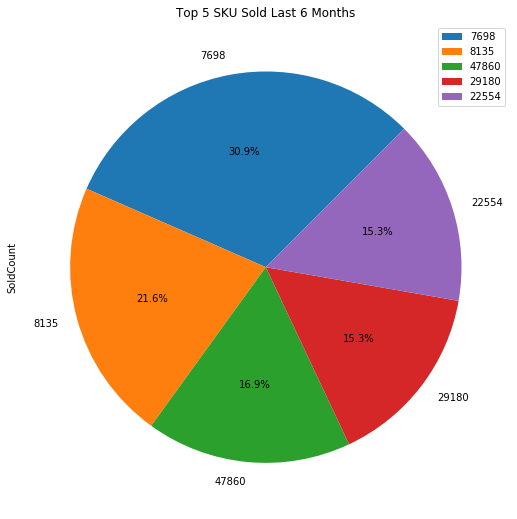

In [8]:
######################## --------Plotting pie charts for distribution-------- ##################
Historical_data_top5.plot.pie(y='SoldCount', figsize=(9, 9), autopct='%1.1f%%', shadow = False, startangle = 45, title='Top 5 SKU Sold Last 6 Months')


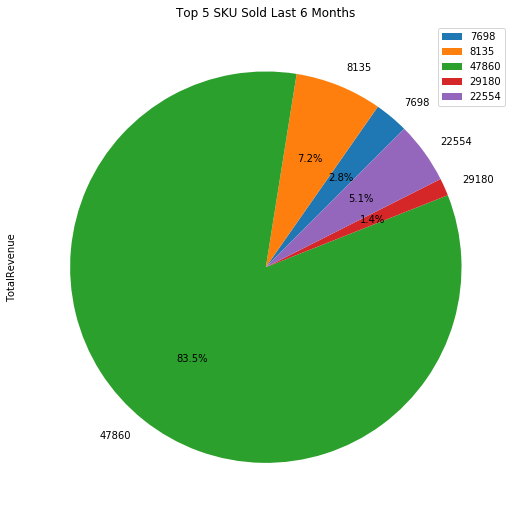

In [9]:
Historical_data_top5.plot.pie(y='TotalRevenue', figsize=(9, 9), autopct='%1.1f%%', shadow = False, startangle = 45, title='Top 5 SKU Sold Last 6 Months')




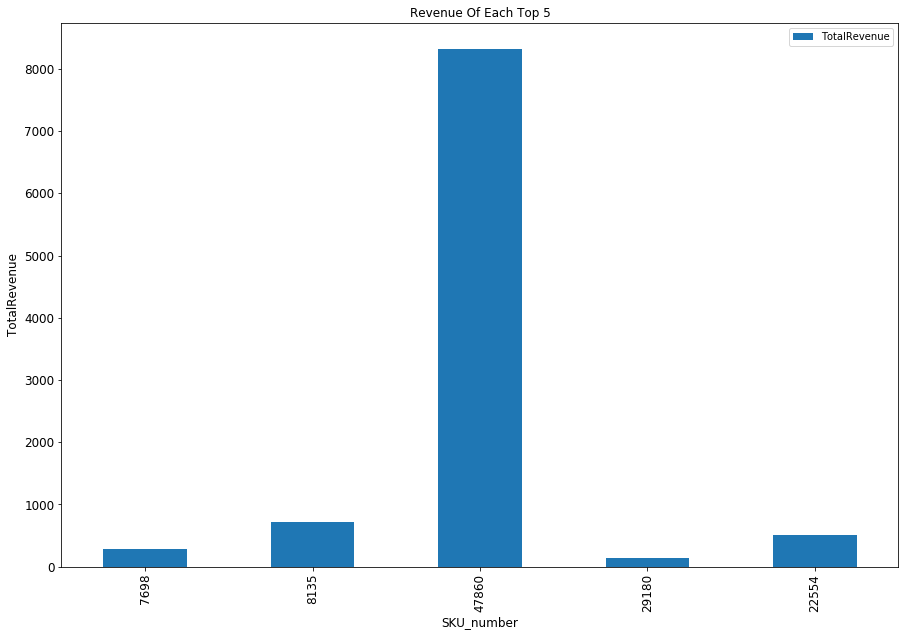

In [10]:
ax = Historical_data_top5[['TotalRevenue']].plot(kind='bar', title ="Revenue Of Each Top 5", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("SKU_number", fontsize=12)
ax.set_ylabel("TotalRevenue", fontsize=12)
plt.show()

In [11]:

HeatMap_Data=Historical_data[['SoldCount','StrengthFactor','DiscountedPrice']]


In [12]:
SoldCount_StrengthFactor_corr=HeatMap_Data['SoldCount'].corr(HeatMap_Data['StrengthFactor'])


In [13]:
SoldCount_DiscountedPrice_corr=HeatMap_Data['SoldCount'].corr(HeatMap_Data['DiscountedPrice'])



In [14]:
StrengthFactor_DiscountedPrice_corr=HeatMap_Data['StrengthFactor'].corr(HeatMap_Data['DiscountedPrice'])



Text(0.5, 1, 'Heatmap of Correlation Matrix')

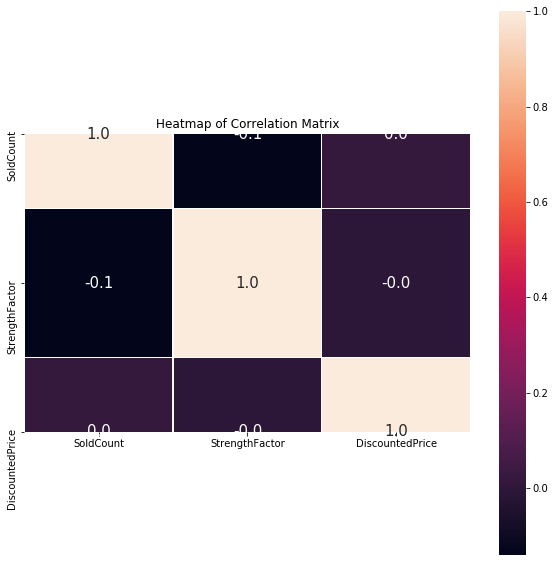

In [15]:
#Plot correlation heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(HeatMap_Data.corr(), annot=True, linewidths=0.1, fmt='.1f', ax=ax, square=True, annot_kws={'size':15})
plt.title('Heatmap of Correlation Matrix')

In [16]:
# Perform Pearson test for correlation
corr_test_SoldCount_StrengthFactor = scp.stats.pearsonr(HeatMap_Data['SoldCount'], HeatMap_Data['StrengthFactor'])
print("SoldCount vs StrengthFactor Correlation Test Value: " + str(corr_test_SoldCount_StrengthFactor[1]) )


SoldCount vs StrengthFactor Correlation Test Value: 2.232203762097149e-181


In [17]:
corr_test_SoldCount_DiscountedPrice = scp.stats.pearsonr(HeatMap_Data['SoldCount'], HeatMap_Data['DiscountedPrice'])
print("SoldCount vs DiscountedPrice Correlation Test Value: " + str(corr_test_SoldCount_DiscountedPrice[1]) )



SoldCount vs DiscountedPrice Correlation Test Value: 0.00043661525127477573


In [18]:
corr_test_StrengthFactor_DiscountedPrice = scp.stats.pearsonr(HeatMap_Data['StrengthFactor'], HeatMap_Data['DiscountedPrice'])
print("DiscountedPrice vs StrengthFactor Correlation Test Value: " + str(corr_test_StrengthFactor_DiscountedPrice[1]) )



DiscountedPrice vs StrengthFactor Correlation Test Value: 0.5786028237657067
